In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

In [241]:
import os
os.chdir("..")
BASE_DIR = os.path.abspath(os.curdir)

In [201]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [202]:
X_train_full.shape

(60000, 28, 28)

In [203]:
y_train_full.shape

(60000,)

In [204]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.1)

Scaling

In [205]:
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

In [206]:
X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape

((54000, 28, 28), (6000, 28, 28), (10000, 28, 28), (54000,), (6000,), (10000,))

In [207]:
X_train.dtype, X_valid.dtype, X_test.dtype, y_train.dtype, y_valid.dtype, y_test.dtype

(dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'))

Model training

In [30]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

# input_ = keras.layers.Input(shape=X_train.shape[1:])
# hidden1 = keras.layers.Dense(100, activation="relu")(input_)
# hidden2 = keras.layers.Dense(100, activation="relu")(hidden1)
# output = keras.layers.Dense(10, activation="softmax")(hidden2)

# model = keras.Model(inputs=[input_], outputs=[output])

In [31]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, 
             optimizer=keras.optimizers.SGD(learning_rate=1e-2), 
             metrics=keras.metrics.sparse_categorical_accuracy)

In [32]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1688/1688 [==============================] - 17s 10ms/step - loss: 0.6392 - sparse_categorical_accuracy: 0.8356 - val_loss: 0.3308 - val_sparse_categorical_accuracy: 0.9065
Epoch 2/30
1688/1688 [==============================] - 14s 8ms/step - loss: 0.2931 - sparse_categorical_accuracy: 0.9169 - val_loss: 0.2646 - val_sparse_categorical_accuracy: 0.9218
Epoch 3/30
1688/1688 [==============================] - 14s 8ms/step - loss: 0.2385 - sparse_categorical_accuracy: 0.9333 - val_loss: 0.2187 - val_sparse_categorical_accuracy: 0.9405
Epoch 4/30
1688/1688 [==============================] - 14s 8ms/step - loss: 0.2035 - sparse_categorical_accuracy: 0.9422 - val_loss: 0.1946 - val_sparse_categorical_accuracy: 0.9435
Epoch 5/30
1688/1688 [==============================] - 14s 8ms/step - loss: 0.1776 - sparse_categorical_accuracy: 0.9496 - val_loss: 0.1730 - val_sparse_categorical_accuracy: 0.9495
Epoch 6/30
1688/1688 [==============================] - 14s 8ms/step - loss: 0.1575 

In [35]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

In [41]:
history.history["loss"].__len__()

30

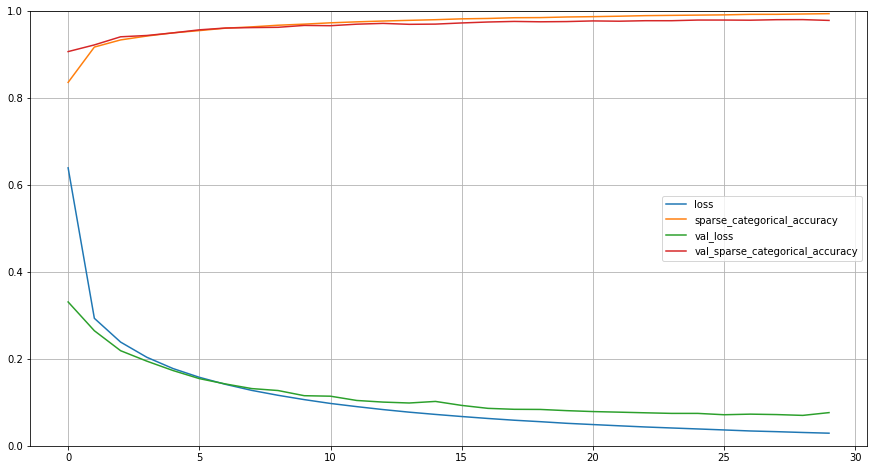

In [52]:
pd.DataFrame(history.history).plot(figsize=(15, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [54]:
history1 = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

Epoch 1/5
1688/1688 [==============================] - 13s 7ms/step - loss: 0.0273 - sparse_categorical_accuracy: 0.9939 - val_loss: 0.0704 - val_sparse_categorical_accuracy: 0.9787
Epoch 2/5
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0260 - sparse_categorical_accuracy: 0.9944 - val_loss: 0.0690 - val_sparse_categorical_accuracy: 0.9812
Epoch 3/5
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0244 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.0684 - val_sparse_categorical_accuracy: 0.9810
Epoch 4/5
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0233 - sparse_categorical_accuracy: 0.9956 - val_loss: 0.0684 - val_sparse_categorical_accuracy: 0.9803
Epoch 5/5
1688/1688 [==============================] - 13s 7ms/step - loss: 0.0220 - sparse_categorical_accuracy: 0.9957 - val_loss: 0.0682 - val_sparse_categorical_accuracy: 0.9807


In [67]:
def update_history(his1, his2):
    his = {}
    assert his1.history.keys() == his2.history.keys(), "both history object has different keys"
    for i, key in enumerate(his1.history.keys()):
        his[key] = his1.history[key] + his2.history[key]
    return his

In [69]:
updated_history = update_history(history, history1)

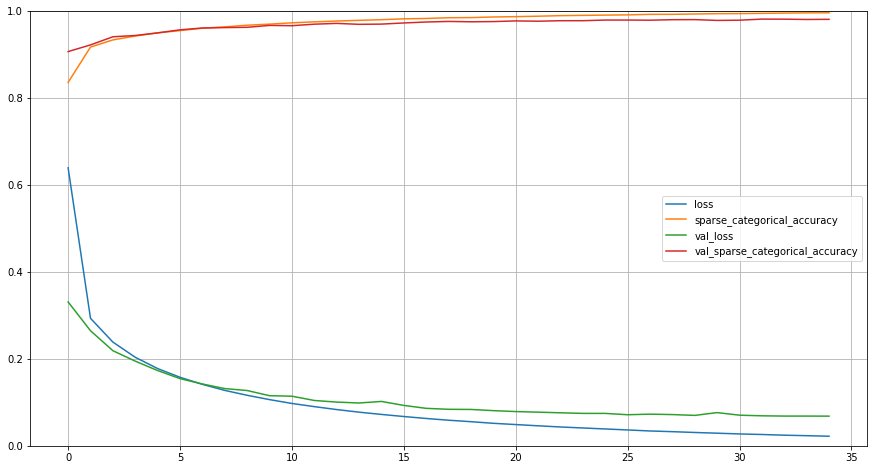

In [70]:
pd.DataFrame(updated_history).plot(figsize=(15, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [71]:
model.evaluate(X_valid, y_valid)

188/188 [==============================] - 1s 6ms/step - loss: 0.0682 - sparse_categorical_accuracy: 0.9807


[0.06818775087594986, 0.9806666374206543]

In [78]:
y_prob = model.predict(X_test)

In [80]:
y_prob[0]

array([1.4514968e-06, 1.6821119e-07, 2.7013702e-05, 2.7823210e-04,
       5.7902692e-09, 3.2421406e-06, 2.8361820e-12, 9.9962974e-01,
       7.4133263e-06, 5.2753196e-05], dtype=float32)

In [87]:
y_pred = np.argmax(y_prob, axis=1)

In [91]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred, average="macro")

0.9764123800866631

In [95]:
hisory2 = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

Epoch 1/5
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0209 - sparse_categorical_accuracy: 0.9960 - val_loss: 0.0681 - val_sparse_categorical_accuracy: 0.9800
Epoch 2/5
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0197 - sparse_categorical_accuracy: 0.9964 - val_loss: 0.0699 - val_sparse_categorical_accuracy: 0.9808
Epoch 3/5
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0187 - sparse_categorical_accuracy: 0.9966 - val_loss: 0.0681 - val_sparse_categorical_accuracy: 0.9802
Epoch 4/5
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0178 - sparse_categorical_accuracy: 0.9969 - val_loss: 0.0666 - val_sparse_categorical_accuracy: 0.9810
Epoch 5/5
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0168 - sparse_categorical_accuracy: 0.9975 - val_loss: 0.0675 - val_sparse_categorical_accuracy: 0.9800


In [96]:
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)
precision_score(y_test, y_pred, average="macro")

0.9776915802837507

In [208]:
B = keras.backend

class ExponentialRaisingLR(keras.callbacks.Callback):
    
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
        
    def on_batch_end(self, batch, logs):
        self.rates.append(B.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        B.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate*self.factor)

In [209]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

We set learning rate to 1e-3 at start and exponentially rise by 0.5% of it's value

In [210]:
expon_lr = ExponentialRaisingLR(factor=1.005)

In [211]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [212]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
             optimizer=keras.optimizers.SGD(learning_rate=1e-3),
             metrics=keras.metrics.sparse_categorical_accuracy)

In [213]:
history = model.fit(X_train, y_train, epochs=1, 
                    validation_data=(X_valid, y_valid), 
                    callbacks=[expon_lr])

1688/1688 [==============================] - 25s 15ms/step - loss: 1.4930 - sparse_categorical_accuracy: 0.5912 - val_loss: 2.3924 - val_sparse_categorical_accuracy: 0.1052


Plot of Loss vs Learning rate

Text(0, 0.5, 'Loss')

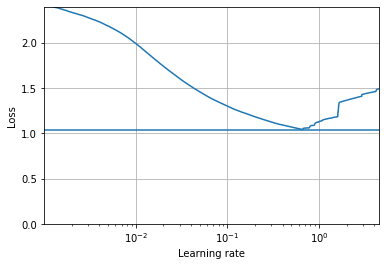

In [232]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale("log")
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

The loss starts growing up when learning rate is near to 6e-1, so we try learning rate to 3e-1 half of that.

In [275]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [276]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [277]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
             optimizer=keras.optimizers.SGD(learning_rate=3e-1),
             metrics=keras.metrics.sparse_categorical_accuracy)

In [287]:
run_index = 1 # increment this at every run
logdir = os.path.join(BASE_DIR, "logs", "ann_mnist_logs")
run_logdir = os.path.join(logdir, "run_{:03d}".format(run_index))
run_logdir

'D:\\programs\\TheCompleteML\\projects\\logs\\ann_mnist_logs\\run_001'

In [279]:
model_path = os.path.join(BASE_DIR, "models", "ann_mnist_model.h5")
model_path

'D:\\programs\\TheCompleteML\\projects\\models\\ann_mnist_model.h5'

In [280]:
early_stoping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint(model_path, save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [281]:
history = model.fit(X_train, y_train, epochs=100, 
                   validation_data=(X_valid, y_valid), 
                   callbacks=[early_stoping_cb, checkpoint_cb, tensorboard_cb])

Epoch 1/100
1688/1688 [==============================] - 13s 8ms/step - loss: 0.2352 - sparse_categorical_accuracy: 0.9271 - val_loss: 0.1468 - val_sparse_categorical_accuracy: 0.9550
Epoch 2/100
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0957 - sparse_categorical_accuracy: 0.9699 - val_loss: 0.1116 - val_sparse_categorical_accuracy: 0.9693
Epoch 3/100
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0629 - sparse_categorical_accuracy: 0.9800 - val_loss: 0.2875 - val_sparse_categorical_accuracy: 0.9240
Epoch 4/100
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0480 - sparse_categorical_accuracy: 0.9847 - val_loss: 0.0901 - val_sparse_categorical_accuracy: 0.9735
Epoch 5/100
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0371 - sparse_categorical_accuracy: 0.9881 - val_loss: 0.0912 - val_sparse_categorical_accuracy: 0.9752
Epoch 6/100
1688/1688 [==============================] - 12s 7ms/step - loss: 0.

In [283]:
model = keras.models.load_model(model_path)
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0891 - sparse_categorical_accuracy: 0.9735


[0.08912378549575806, 0.9735000133514404]

In [304]:
%reload_ext tensorboard
%tensorboard --logdir=../logs/ann_mnist_logs --port=6006

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
Traceback (most recent call last):
  File "D:\programs\TheCompleteML\env\lib\site-packages\tensorboard\compat\__init__.py", line 42, in tf
    from tensorboard.compat import notf  # noqa: F401
ImportError: cannot import name 'notf' from 'tensorboard.compat' (D:\programs\TheCompleteML\env\lib\site-packages\tensorboard\compat\__init__.py)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "D:\programs\TheCompleteML\env\Scripts\tensorboard.exe\__main__.py", line 7, in <module>
  File "D:\programs\TheCompleteML\env\lib\site-packages\tensorboard\main.py", line 39, in run_main
    main_l

In [307]:
del y_prob

In [309]:
del history

NameError: name 'history' is not defined

In [308]:
import gc
gc.collect()

121